# Importing the packages and data

In [20]:
# First thing is to import the packages that are going to be used to read and analyze the data,

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Since some data can be misleading in terms of "type", let's convert some data types that might not be 
# correctly defined, by using dictionaries.

data_types = {'release_year': str,
              'gross_earnings': float,
              'budget': float}

# This is a step to save the file path on my computer.
file = '/Users/pedro_andrade/Desktop/Intro to Python/movies_unlocked.xlsx'


# Let's define our dataframe and read the excel file to start our analysis.
df = pd.read_excel ( io = file,
                     sheet_name = 0,
                     dtype = data_types,
                     header = 0)

# It is important to print the information about the dataframe, checking for the data types that might not be
# correct and also any missing values.
print(df.info())

# Also, let's show the first five rows and labels of our dataset.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1677 non-null   object 
 1   genre                1677 non-null   object 
 2   release_year         1677 non-null   object 
 3   country              1677 non-null   object 
 4   runtime              1677 non-null   int64  
 5   language             1677 non-null   object 
 6   rating               1677 non-null   object 
 7   gross_earnings       1677 non-null   float64
 8   budget               1677 non-null   float64
 9   imdb_score           1677 non-null   float64
 10  average_user_rating  1668 non-null   float64
 11  num_user_votes       1668 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 157.3+ KB
None


,title,genre,release_year,country,runtime,language,rating,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
0,The Jimmy Show,Comedy,2001,USA,96,English,R,703.0,1500000.0,5.4,5.2,535.0
1,Detention of the Dead,"Action, Adventure",2012,USA,87,English,Not Rated,1332.0,500000.0,4.6,4.5,2531.0
2,The Oxford Murders,"Crime, Mystery",2008,Spain,104,English,R,3607.0,10000000.0,6.1,6.1,27984.0
3,Newlyweds,Comedy,2011,USA,95,English,Not Rated,4584.0,9000.0,6.4,6.3,1528.0
4,Gangster's Paradise: Jerusalema,"Action, Crime",2008,South Africa,119,English,R,4958.0,2000000.0,7.8,7.3,10373.0


In [2]:
# Applying the heurestic rule on the dataset
heuristic_rule = 9 / 1677 * 100
rounded_rule = round(heuristic_rule, ndigits = 2)

print('-'*40)

print(df.isnull().sum(axis = 0))

print('-' * 40, '\n')


print(f"""The heuristic rules applies in this case because 
the missing values represent only {rounded_rule}% 
of the observations!""")


----------------------------------------
title                  0
genre                  0
release_year           0
country                0
runtime                0
language               0
rating                 0
gross_earnings         0
budget                 0
imdb_score             0
average_user_rating    9
num_user_votes         9
dtype: int64
---------------------------------------- 

The heuristic rules applies in this case because 
the missing values represent only 0.54% 
of the observations!


In [3]:
# Dropping missing values
df_dropped = df.dropna()

# Printing the results
print(df_dropped.isnull().sum())

title                  0
genre                  0
release_year           0
country                0
runtime                0
language               0
rating                 0
gross_earnings         0
budget                 0
imdb_score             0
average_user_rating    0
num_user_votes         0
dtype: int64


After importing the packages and reading the file, the most important thing is to check the dataset for dirty data (wrong data types, missing values) and anything that can get in your way to properly analyze the data, leading you to wrong conclusions. I applied the heurestic rule since the number of missing values was not that many, representing just a small proportion of the total observations. I decided then, to drop those missing values, and work with a clean dataset.

# Descriptive Statistics of all movies

In [4]:
# descriptive statistics
df_dropped.describe(include = 'number').round(decimals = 2)

,runtime,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
count,1668.00,1.668000e+03,1.668000e+03,1668.00,1668.00,1668.00
mean,109.78,5.131354e+07,4.919944e+07,6.45,6.41,121073.44
std,21.60,7.301856e+07,3.116273e+08,1.03,1.01,201492.96
min,37.00,7.030000e+02,2.180000e+02,1.60,1.60,5.00
25%,96.00,7.571550e+06,1.000000e+07,5.80,5.80,13222.50
50%,106.00,2.760743e+07,2.500000e+07,6.50,6.50,52283.00
75%,119.00,6.451583e+07,5.200000e+07,7.20,7.10,138269.75
max,289.00,9.366274e+08,1.221550e+10,8.90,8.90,2100917.00


# Distribution of Movies

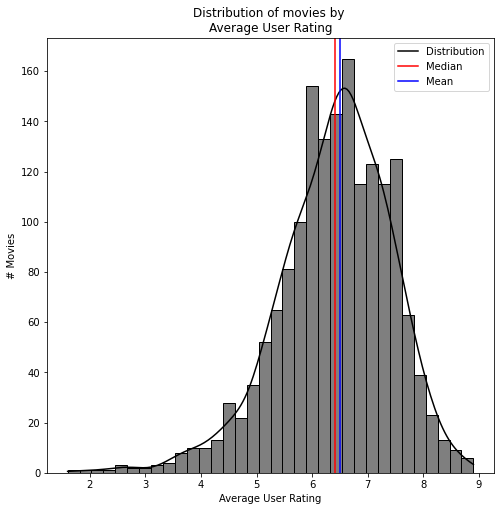

In [5]:
# Average User Rating Distribution

fig, ax = plt.subplots(figsize = (8 ,8))

# Creating the histogram
sns.histplot(data = df_dropped,
             x = 'average_user_rating',
             bins = 'fd', # Optimal number of bins using Freedman-Diaconis rule
             kde = True,
             color = 'black')

# title and labels
plt.title("""Distribution of movies by 
Average User Rating""")
plt.xlabel("Average User Rating")
plt.ylabel("# Movies")

# adding mean and median (vertical lines)
plt.axvline (x = df_dropped['average_user_rating'].mean(),
             color = 'red')
plt.axvline (x = df_dropped['average_user_rating'].median(),
             color = 'blue')

# adding legend to the plot
plt.legend (labels = ['Distribution','Median','Mean'])

plt.show()

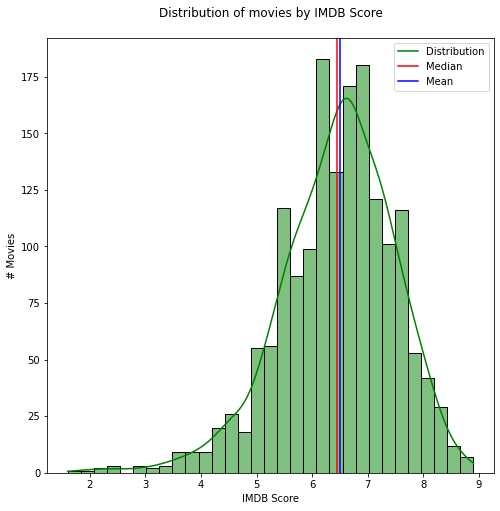

In [6]:
# IMDB Score Distribution

fig, ax = plt.subplots(figsize = (8 ,8))

# Creating the histogram
sns.histplot(data = df_dropped,
             x = 'imdb_score',
             bins = 'fd', # Optimal number of bins using Freedman-Diaconis rule
             kde = True,
             color = 'green')

# title and labels
plt.title("Distribution of movies by IMDB Score\n")
plt.xlabel("IMDB Score")
plt.ylabel("# Movies")

# adding mean and median (vertical lines)
plt.axvline (x = df_dropped['imdb_score'].mean(),
             color = 'red')
plt.axvline (x = df_dropped['imdb_score'].median(),
             color = 'blue')

# adding legend to the plot
plt.legend (labels = ['Distribution','Median','Mean'])

plt.show()


It is very interesting to notice some details about the data. Looking at the IMDB Score and User Rating, we see that the average and the median score are very close, being the average (mean) a little smaller than the central value (median) of all scores in these two variables. The two graphs show exactly that, being the chart on the left the Average User Rating and the one on the right the average of IMDB Score. The distribution of movies based on these two variables are almost normal, and due to this small difference between the mean and median, the distribution is slightly skewed to the left.

Another interesting fact is the length of all movies, being 109 minutes (almost 1 hour and 50 minutes) the average length. This is relatively short, it seems that most movie lengths fall near the mean and median, also demonstrating a nearly normal distribution, but in this case, since the mean is greater than the median, the chart would be shifted a little to the right. The histogram chart looks like this:

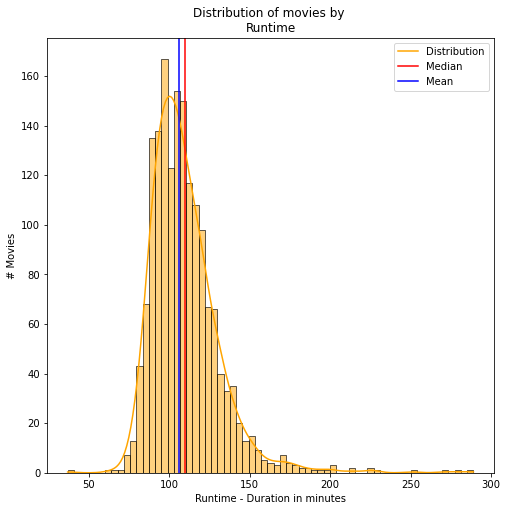

In [7]:
# Distribution of Movies based on Runtime (movie duration)

# resizing the plot, to make it more visable.
fig, ax = plt.subplots(figsize = (8 ,8))


# Creating the histogram plot
sns.histplot(data = df_dropped,
             x = 'runtime',
             bins = 'fd',
             kde = True,
             color = 'orange')

# title and labels
plt.title("""Distribution of movies by 
Runtime""")
plt.xlabel("Runtime - Duration in minutes")
plt.ylabel("# Movies")

# adding mean and median (vertical lines)
plt.axvline (x = df_dropped['runtime'].mean(),
             color = 'red')
plt.axvline (x = df_dropped['runtime'].median(),
             color = 'blue')

# Adding a legend to the histogram.
plt.legend (labels = ['Distribution','Median','Mean'])

# Showing the final result of the plot.
plt.show()

# Correlation Matrix of all movies

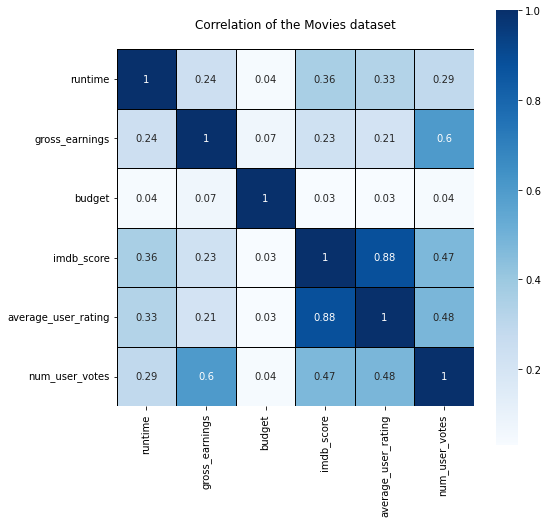

In [8]:
# Understanding the relation between the numeric variables

# Creating the correlation matrix first 
data_corr = df_dropped.corr(method = 'pearson').round(decimals = 2)

# Redefining the size of the heatmap 
fig, ax = plt.subplots(figsize = (8 ,8))

# Creating the heatmap based on the correlation matrix.
sns.heatmap( data = data_corr,
             cmap = 'Blues',
             square = True,
             annot = True,
             linecolor = 'black',
             linewidth = 0.5)

# Adding a title to the heatmap
plt.title(label = 'Correlation of the Movies dataset\n')

# Plotting the heatmap
plt.show()

In [9]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(*, x=None, y=None, data=None, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=None, sharey=None, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, facet_kws=None, size=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most import

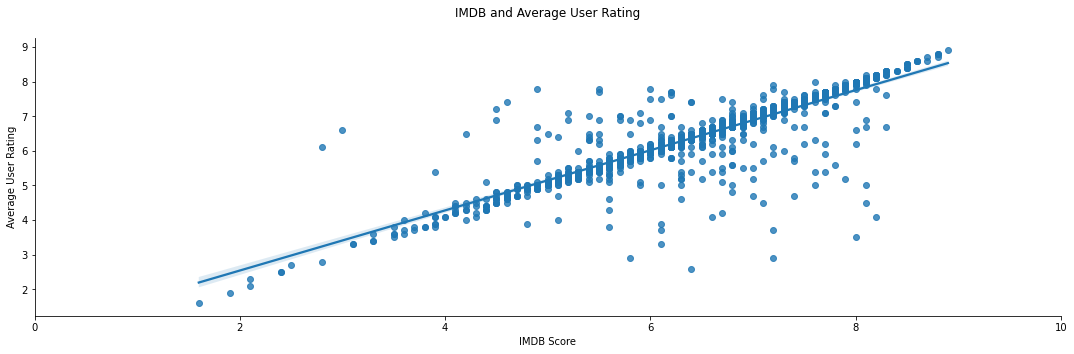

In [10]:
# Scatter plot of IMDB score and AVG_User_rating

sns.lmplot ( x = 'imdb_score',
             y = 'average_user_rating',
             hue        = None,
             scatter    = True, 
             fit_reg    = True, 
             aspect     = 3, 
             data       = df_dropped)

# Formatting the scatter plot to make it more user friendly
plt.title(label  = 'IMDB and Average User Rating\n')
plt.xlabel(xlabel = 'IMDB Score')
plt.ylabel(ylabel = 'Average User Rating')
plt.xlim(left   = 0, right = 10)
plt.tight_layout(pad    = 1)

# Showing the plot
plt.show(block  = True)


That was really fun to see, the correlation between our data. Even more fun is to check that the users ratings are very close related and increase in parallel with an "official" rating website. Through the heatmap graph and the scatter plot with trend line, we can clearly see that the increase in IMDB Score is followed by an increase in the User Rating. Some movies seem to be a disperse, but most of the data seems to follow this pattern, represented by the trend line.  

Another interesting fact about the heatmap is the possible relation between the Gross Earnings and Number of User Votes. Is it possible to say that the most interactions of users with a particular movie, means that the movie might generate more revenues, related to more merchandise sold? More streams and more advertisement? Those are some questions that might explain this relation, and the graph to demonstrate that is shown below. Interesting to notice that most of the data is concentrated between 0 and 250,000 votes (0.25*10^6) and 0 and $100,000,000 (1*10^8) in gross earnings, but after that is shows a slightly positive trend line, increasing while both variables are increasing as well. 

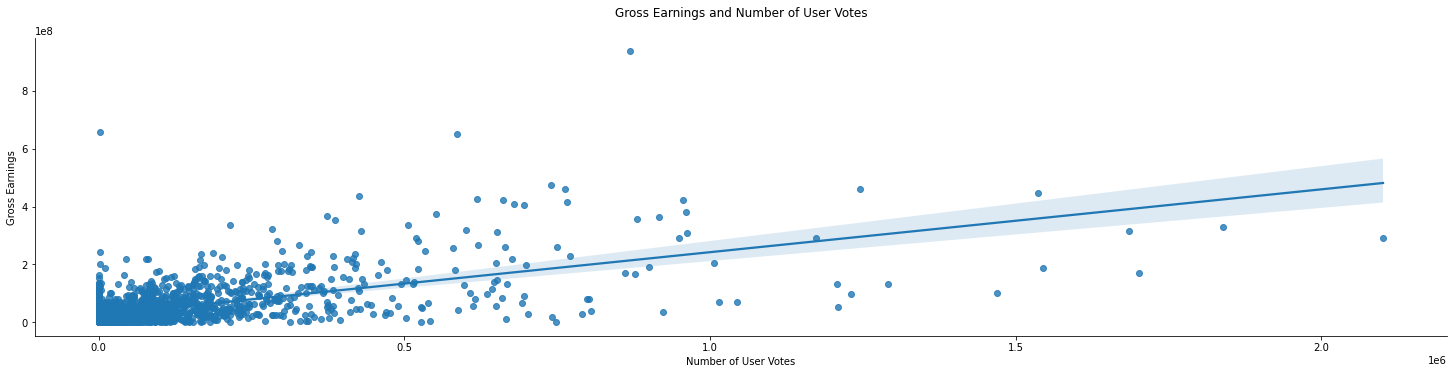

In [11]:
# Scatter plot of Gross Earnings and Number of User Votes
sns.lmplot ( x = 'num_user_votes',
             y = 'gross_earnings',
             hue        = None,
             scatter    = True, 
             fit_reg    = True, 
             aspect     = 4, 
             data       = df_dropped)

# Formatting the plot.
plt.title(label  = 'Gross Earnings and Number of User Votes\n')
plt.xlabel(xlabel = 'Number of User Votes')
plt.ylabel(ylabel = 'Gross Earnings')
plt.tight_layout(pad    = 0)

#Showing the plot
plt.show(block  = True)


# Descriptive Statistics of Sports Movies

In [12]:
# Finding out how many movies are categorized as Sports
movies_sports = 0

for index, col in df_dropped.iterrows():
    if 'Sport' in df_dropped.loc[index, 'genre']:
        movies_sports = movies_sports + 1
    else:
        continue
    
print(f"Sports Movies: {movies_sports}")

# There are only 10 movies inside the "Sports" genre.
df_sports = df_dropped[df_dropped['genre'].str.contains('Sport')]

# Outputing the result of the whole dataset, since we only have 10 movies.
df_sports

Sports Movies: 10


,title,genre,release_year,country,runtime,language,rating,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
119,The Game of Their Lives,"Documentary, Sport",2005,USA,101,English,PG,375474.0,20000000.0,6.2,7.7,269.0
127,The Damned United,"Biography, Sport",2009,UK,98,English,R,449558.0,10000000.0,7.6,7.5,41934.0
162,Without Limits,"Biography, Sport",1998,USA,117,English,PG-13,777423.0,25000000.0,7.2,7.2,6636.0
452,The Express,"Biography, Sport",2008,USA,130,English,PG,9589875.0,40000000.0,7.3,7.3,20120.0
530,Whip It,Sport,2009,USA,111,English,PG-13,13034417.0,15000000.0,6.9,6.9,64364.0
1084,"McFarland, USA","Biography, Sport",2015,USA,129,English,PG,44469602.0,17000000.0,7.4,7.4,35857.0
1200,The Benchwarmers,"Comedy, Sport",2006,USA,75,English,PG-13,57651794.0,33000000.0,5.6,5.5,48611.0
1411,42,"Biography, Sport",2013,USA,128,English,PG-13,95001343.0,40000000.0,7.5,7.5,87863.0
1475,Dodgeball: A True Underdog Story,"Comedy, Sport",2004,USA,92,English,PG-13,114324072.0,20000000.0,6.7,6.7,231466.0
1676,The Color of Money,Sport,1986,USA,119,English,R,52293982.0,13800000.0,7.0,7.0,76132.0


In [13]:
# Analyzing the descriptive of Sports
df_sports.describe().round(decimals = 2)

,runtime,gross_earnings,budget,imdb_score,average_user_rating,num_user_votes
count,10.00,1.000000e+01,10.0,10.00,10.00,10.00
mean,110.00,3.879675e+07,23380000.0,6.94,7.07,61325.20
std,18.23,4.128776e+07,10812523.6,0.63,0.63,66234.90
min,75.00,3.754740e+05,10000000.0,5.60,5.50,269.00
25%,98.75,2.980536e+06,15500000.0,6.75,6.93,24054.25
50%,114.00,2.875201e+07,20000000.0,7.10,7.25,45272.50
75%,125.75,5.631234e+07,31000000.0,7.38,7.48,73190.00
max,130.00,1.143241e+08,40000000.0,7.60,7.70,231466.00


Going deeper on the analysis, we reach our specific movie genre, Sports, the genre that we are going to make some comparisons between some of the variables and data found on the general analysis. 

Our sample of analysis is smaller, only 10 movies under the Sports category, but we can take some interesting insights. For example the runtime, being almost the same (110 minutes - Sports and 109 minutes - Average all movies). Average gross earnings and budget are smaller, but there is a fun twist to this two variables, when analyzed them together, on what I called the Gross Earnings/Budget Ratio, which I will talk about further down this analysis.

Also, the average evaluation (IMDB and User Rating) are higher when compared to the average of all movies. Are Sports Movies the favorite genre of the audience? What about sports movie is increasing the score? Let us dive deeper to find out.

# Correlation Matrix - Sports

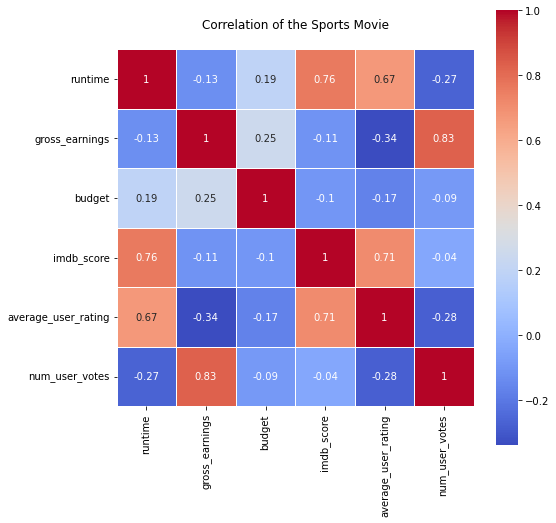

In [14]:
# Creating the correlation matrix for Sports Movie only.
corr_sports = df_sports.corr(method = 'pearson').round(decimals = 2)

# Resizing the plot
fig, ax = plt.subplots(figsize = (8 ,8))

# Creating the heatmap
sns.heatmap(data = corr_sports,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'white',
            linewidth = 0.5)
# Adding a title
plt.title(label = 'Correlation of the Sports Movie\n')

# Showing the final plot
plt.show()

# Analysis of Sports Movies Genre in comparison with the entire movie database.

# Introduction

Everyone loves a good story. Who does not like to listen to a friend's story about their lives, or an accomplishment? Specially in the USA, some of those accomplishments are often related to sports, in high school, college, or even professionally. The movie industry is certainly taking advantage of this, and producing amazing movies with a sports background that are getting the attention of the audience according to the Netflix database that is about to be presented. Are you ready to go deeper in this world?

# Insights

After a throughout analysis of the movie database and the Sport genre, three points caught my attention:
1. The genre Sport generates more Gross Earnings, proportionally to their Budget, in comparison with all other movies.
2. Sports movies have higher evaluation rates (IMDB and User Ratings).
3. Real life stories - biographies related sports movies, have higher evaluation scores than other genres.

In [16]:
#Insight 1 - Sports Movie generate more earnings per budget.

# Focusing on the average of Budget and Gross Earnings for Sports Movies and the entire dataset.
avg_budget_sports = df_sports['budget'].mean()
avg_budget_movies = round(df_dropped['budget'].mean(), ndigits = 2)
avg_gross_earn_sports = df_sports['gross_earnings'].mean()
avg_gross_earn_movies = round(df_dropped['gross_earnings'].mean(), ndigits = 2)


# Let's calculate the ratio between the two variables. Which one generates more revenues
# in relation to their budge?
gross_budget_ratio_sports = round(avg_gross_earn_sports / avg_budget_sports, ndigits = 2)
gross_budget_ratio_movies = round(avg_gross_earn_movies / avg_budget_movies, ndigits = 2)

print('-' * 40, '\n')

print(f"""The ratio between Gross Earnings and Budget for sports movies: {gross_budget_ratio_sports}
The ratio between Gross Earnings and Budget for all movies: {gross_budget_ratio_movies}
""")

---------------------------------------- 

The ratio between Gross Earnings and Budget for sports movies: 1.66
The ratio between Gross Earnings and Budget for all movies: 1.04



# Insight #1 - Explanation

It is interesting to notice that the genre sports have smaller budgets when compared to the average budget of all the other movies on this dataset. But that does not mean that sports movies do not make money in the end. In fact that is completely the opposite. The average gross earning of sports movies represents 66% more of their original budget! That means that for every dollar spent on the production of the movie, the movie generates 1.66 dollars in total revenue. The other movie genres only generates 1.04 per dollar spent, only four percent of their initial budget.

We can definitely say that sports movies are much more cost efficient, generating more money per dollar spent that all the other movies. Sports genre are an interesting option to invest when deciding to produce a new movie!

In [21]:
# Insight 2

# Analyzing the IMDB Score and Average User Rating of Sports Movies and all movies.
avg_imdb_sports = df_sports['imdb_score'].mean()
avg_avg_user_sports = df_sports['average_user_rating'].mean()
avg_imdb_movies = round(df_dropped['imdb_score'].mean(), ndigits = 2)
avg_user_movies = round(df_dropped['average_user_rating'].mean(), ndigits = 2)

print('-' * 40, '\n')

print(f"""The average IMDB Score for sports movies: {avg_imdb_sports}
The average IMDB Score for all movies: {avg_imdb_movies}
\n""")

print('-' * 40, '\n')

print(f"""The average User Rating Score for sports movies: {avg_avg_user_sports}
The average User Rating Score for all movies: {avg_user_movies}
\n""")


---------------------------------------- 

The average IMDB Score for sports movies: 6.94
The average IMDB Score for all movies: 6.45


---------------------------------------- 

The average User Rating Score for sports movies: 7.07
The average User Rating Score for all movies: 6.41




# Insight #2 and #3 - Explanation

It is a trend and people are talking about them. Sports movies are becoming more and more popular and are part of the American society and culture. As Bonnet(2017) said, "Nowadays, the belief in sports’ social role is still lasting: it is thought to bolster the teaching of and respect for values which are essential to Americanness, such as competitiveness, equal opportunities, or social mobility." 

Firestein (2007) defined: "Sports are part of the very fabric of American life, discourse, and lexicon [...]. The centrality of sports in American life is amply reflected in contemporary American cinema, (with) films featuring virtually every major sport, from football, basketball, baseball, and hockey, to boxing, horse racing, and even surfing."

These explain exactly why sports movies have higher scores, both at the IMDB website and User Ratings. When we look at the numbers, sports movie IMDB scores average 6.94 (out of 10) while the average of all movies is only 6.45. Users also evaluate sports movie better in average, rating 7.07, when the average of all movies is 6.41. 

Not only that. The numbers also confirm the preference for real-life stories, as the sports movies based on biographies have higher IMDB Score and User Ratings than the other sub-genres of sports and the average of all movies! For example the movie "42", a Biography/Sport movie released in 2013, in the US. The movie is about a baseball player called Jackie Robinson, who was the first black athlete to play in Major League Baseball in the modern era (late 19th and early 20th centuries). 

This by itself brings a lot of social themes to debate, especially in context that we are still battling racial issues in the 21st century, more than 70 years later! "42" has a rating of 7.5, both at IMDB and User Ratings, comparing to 6.94 (Sports IMDB average) and 7.07(User Rating Sports average). 

When movies addresses social issues, it seems to create a sort of a mirror reflecting real-life and bringing important values to discussion in an entertaining way. Sports movies can easily address these issues in many ways, like resilience, patience, willingness to achieve goals, hard work and many other, through the lifes of many athletes and sports references in many different sports. 


# Conclusion

After all these analysis, it is noticeable that Sports Movies are an interesting way to connect to the audience and fans of movies, at the same time entertaining and addressing real-life conflicts and social issues. They can be a powerful tool to change people's mindset on many issues, teaching valuable lessons on ethics, resilience, respect, humility, and many other principles that build character. 

It is also a profitable segment, since a small budget can turn into a source of good revenue if the history is well built and portrayed. The audience love a good story, based on a real-life situation or character with a strong and beautiful message behind, that can be applied or used as motivation out from the screen. 

As a rock climber and footballer and above all, a great sports fan, I love to watch movie about sports and I truly believe that sports can teach us great lessons, and I wish there were more movies related to it to make a more impactful analysis, with more examples to compare and get more insights. 

# References
    
Firestein, D. J..“Fields of Dreams: American Sports Movies.” E journal USA, 12 (6), 2007, 9.

Bonnet, V. "Sport in Films: Symbolism versus Verismo. A France-United States Comparative Analysis", InMedia Online, 6 | 2017, visited on June 1, 2022. URL : http://journals.openedition.org/inmedia/883 ; DOI : https://doi.org/10.4000/inmedia.883

“42 (film)” Wikipedia, Wikimedia Foundation, 19 May 2022, URL : https://en.wikipedia.org/wiki/42_(film)